<center> <h1> Credit Card: K-Means Clustering</h1> </center>

<br>
<center>
<img src="https://static.toiimg.com/thumb/66538171.cms?resizemode=4&width=400"></center>
source image: https://bangaloremirror.indiatimes.com/bangalore/others/credit-card-customer-walks-away-bank-loses-rs-30000-it-didnt-have-record-of-his-application/articleshow/66538133.cms

<h3> Summary </h3>

Credit card segmentation is a crucial strategy used by financial institutions to categorize their customers based on various attributes and behaviors. This practice allows banks and credit card companies to better understand their customer base, tailor their products and services to specific groups, and optimize marketing efforts.

The importance of credit card segmentation lies in its ability to provide personalized solutions and offers to different customer segments. By identifying distinct groups of customers with similar needs and spending patterns, banks can create targeted marketing campaigns, loyalty programs, and rewards that are more likely to resonate with each segment. This, in turn, enhances customer satisfaction and increases the likelihood of customer retention.

<h3> Statement of the problem and goal </h3>

Since the data are collected by every credit activities, the company hope they could get some insight by processing the data. This time, we have a data contains summary of the usage behavior of about 9000 active credit card holders during the last 6 months. We will process this data using unsupervised learning methodology to segmentize the customer by finding a certain pattern in hope we could find some characteristic between each customer segment.

Then we will analyze each segment and plan the marketing approach that work best with each segment. We also give some recommendation for the next if we want to update the model or strategies.

## Dataset

The data set was obtained from the following <a href = "https://www.kaggle.com/datasets/arjunbhasin2013/ccdata">link. </a>
> <i>The sample Dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.</i>
    

Following is the Data Dictionary for Credit Card dataset :

<table class="default">
  <tr>
    <th>Variable</th>
    <th>Description</th>
 </tr>
 <tr>
    <td><b>CUST_ID</b></td>
    <td>Identification of Credit Card holder (Categorical)</td>
 </tr> 
 <tr>
    <td><b>BALANCE</b></td>
    <td>Balance amount left in their account to make purchases.</td>
</tr>
<tr>
    <td><b>BALANCE_FREQUENCY</b></td>
    <td>How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 =         not frequently updated)</td>
</tr>
<tr>
    <td><b>PURCHASES</b></td>
    <td>Amount of purchases made from account.</td>
</tr>
<tr>
    <td><b>ONEOFF_PURCHASES</b></td>
    <td>Maximum purchase amount done in one-go.</td>
</tr>
<tr>
    <td><b>INSTALLMENTS_PURCHASES</b></td>
    <td>Amount of purchase done in installment.</td>
</tr> 
<tr>
    <td><b>CASH_ADVANCE</b></td>
    <td>Cash in advance given by the user.</td>
</tr> 
<tr>
    <td><b>PURCHASES_FREQUENCY</b></td>
    <td>How frequently the Purchases are being made, score between 0 and 1 (1 = frequently
        purchased, 0 = not frequently purchased).</td>
</tr> 
<tr>
    <td><b>ONEOFFPURCHASESFREQUENCY</b></td>
    <td>How frequently Purchases are happening in one-go (1 = frequently purchased, 0 = not
        frequently purchased).</td>
</tr> 
 <tr>
    <td><b>PURCHASESINSTALLMENTSFREQUENCY</b></td>
    <td>How frequently purchases in installments are being done (1 = frequently done, 0 = not
        frequently done).
</td>
</tr> 
<tr>
    <td><b>CASHADVANCEFREQUENCY</b></td>
    <td>How frequently the cash in advance being paid.
</td>
</tr> 
<tr>
    <td><b>CASHADVANCETRX</b></td>
    <td>Number of Transactions made with "Cash in Advanced".
</td>
</tr> 
<tr>
    <td><b>PURCHASES_TRX</b></td>
    <td>Numbe of purchase transactions made.
</td>
</tr> 
<tr>
    <td><b>CREDIT_LIMIT</b></td>
    <td>Limit of Credit Card for user.</td>
</tr> 
<tr>
    <td><b>PAYMENTS</b></td>
    <td>Amount of Payment done by user.
</td>
</tr> 
 <tr>
    <td><b>MINIMUM_PAYMENTS</b></td>
    <td>Minimum amount of payments made by user.
</td>
</tr> 
<tr>
    <td><b>PRCFULLPAYMENT</b></td>
    <td>Percent of full payment paid by user.
</td>
</tr> 
<tr>
    <td><b>TENURE</b></td>
    <td>Tenure of credit card service for user.</td>
</tr> 
</table>

<h3>Outline </h3>

<ol>
    <li>Data prepocesing & data visualization. </li>
    <li>Modeling data.</li>
</ol>

---

<h2> Libraries</h2>

In [1]:
## Libraries
import pandas as pd
import numpy as np

## ignore warnings
import warnings
warnings.filterwarnings(action="ignore")

## Visualization
import seaborn as sns
import matplotlib.pyplot as plt

## Preprocesing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity

## Clustering
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from matplotlib import cm
from sklearn.metrics import silhouette_samples, silhouette_score

<h2> Load Data</h2>

In [21]:
df = pd.read_csv('/kaggle/input/ccdata/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,8950.0,1564.474828,2081.531879,0.000000,128.281915,873.385231,2054.140036,19043.13856
BALANCE_FREQUENCY,8950.0,0.877271,0.236904,0.000000,0.888889,1.000000,1.000000,1.00000
PURCHASES,8950.0,1003.204834,2136.634782,0.000000,39.635000,361.280000,1110.130000,49039.57000
ONEOFF_PURCHASES,8950.0,592.437371,1659.887917,0.000000,0.000000,38.000000,577.405000,40761.25000
INSTALLMENTS_PURCHASES,8950.0,411.067645,904.338115,0.000000,0.000000,89.000000,468.637500,22500.00000
CASH_ADVANCE,8950.0,978.871112,2097.163877,0.000000,0.000000,0.000000,1113.821139,47137.21176
PURCHASES_FREQUENCY,8950.0,0.490351,0.401371,0.000000,0.083333,0.500000,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,8950.0,0.202458,0.298336,0.000000,0.000000,0.083333,0.300000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,8950.0,0.364437,0.397448,0.000000,0.000000,0.166667,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,8950.0,0.135144,0.200121,0.000000,0.000000,0.000000,0.222222,1.50000


> <b> Inference </b>: We can see that the data is not standardized.

<h1> Data Visualization and Preprocessing </h1>

In [24]:
df.columns = [col.lower() for col in df.columns]

In [7]:
## Count null values
df.isnull().sum().sort_values(ascending = False)

minimum_payments                    313
credit_limit                          1
cust_id                               0
balance                               0
prc_full_payment                      0
payments                              0
purchases_trx                         0
cash_advance_trx                      0
cash_advance_frequency                0
purchases_installments_frequency      0
oneoff_purchases_frequency            0
purchases_frequency                   0
cash_advance                          0
installments_purchases                0
oneoff_purchases                      0
purchases                             0
balance_frequency                     0
tenure                                0
dtype: int64

In [25]:
## Replace null values by the median value. 

df['minimum_payments'].fillna(df['minimum_payments'].median(), inplace=True)
df['credit_limit'].fillna(df['credit_limit'].median(), inplace= True)

In [26]:
## Check if there are null values
df.isnull().sum().sum()

0

In [27]:
## Remove cust_id column 
df.drop('cust_id', axis = 1, inplace = True )

> <b> Inference</b>: <ol>
    <li>`CUST_ID` was excluded from customer segmentation analysis. </li>
    <li>`CREDIT_LIMIT` and `MINIMUM_PAYMENTS`contain null values, which have been replaced by the median. </li>
    <li>The dataset contains only numeric values. </li>
   </ol>

<h3> Check Outliers </h3>

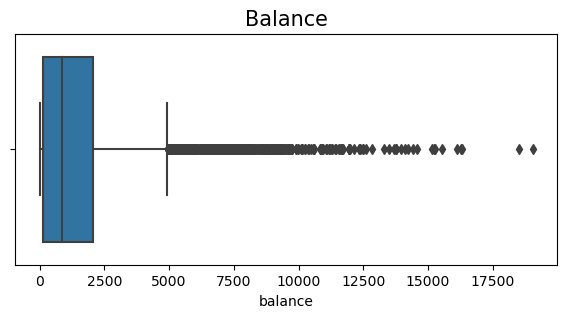

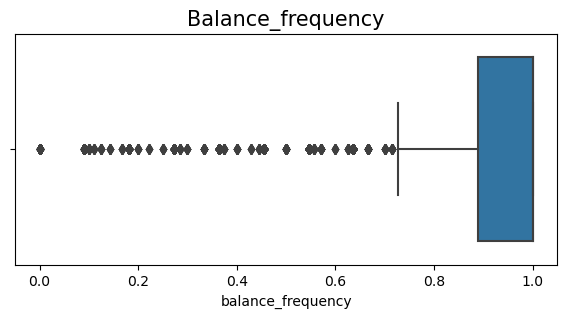

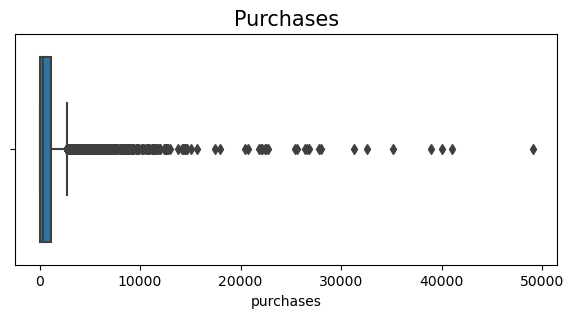

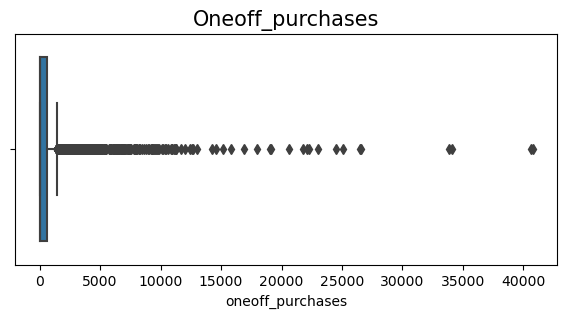

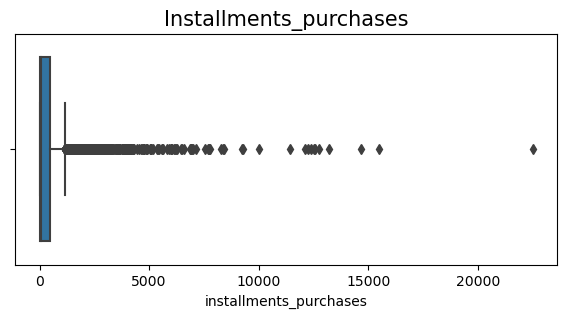

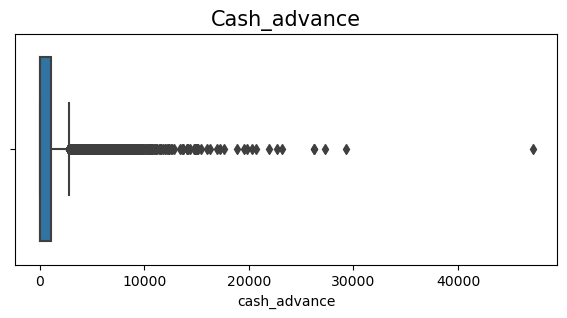

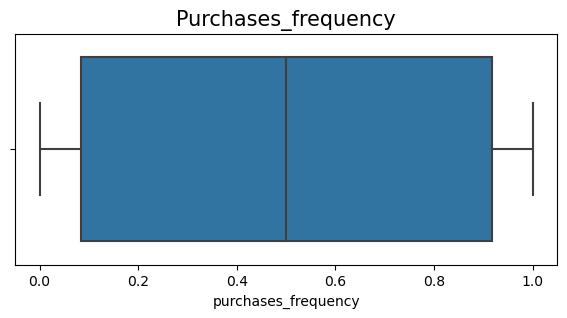

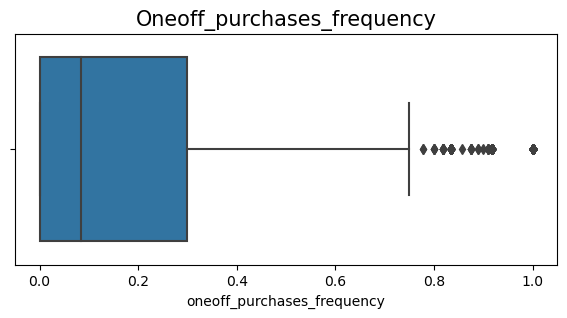

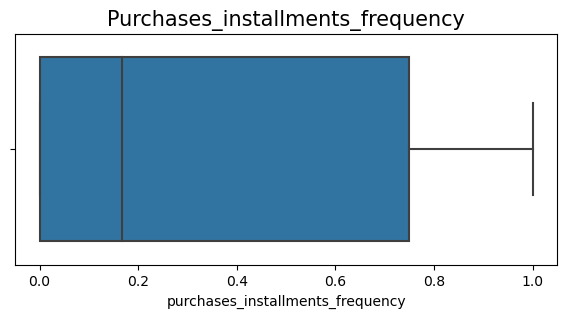

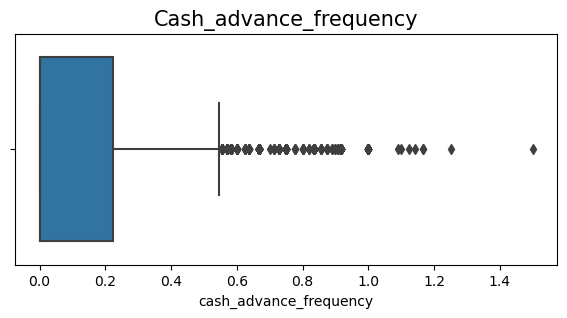

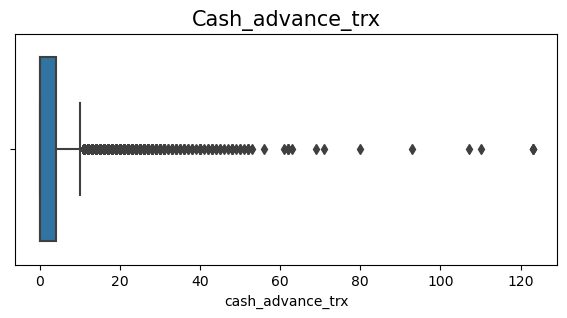

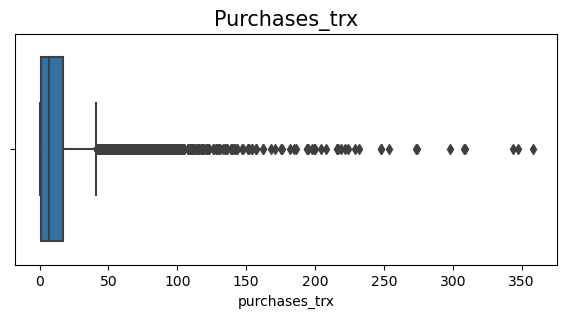

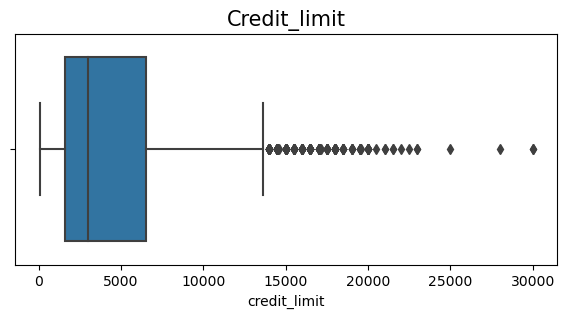

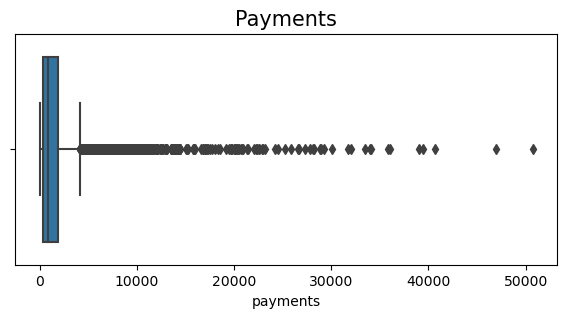

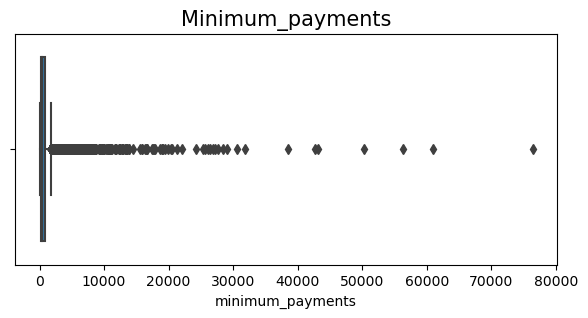

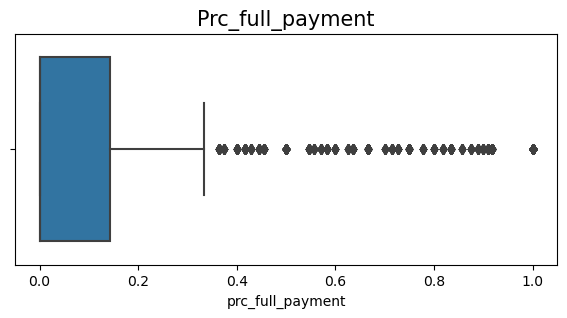

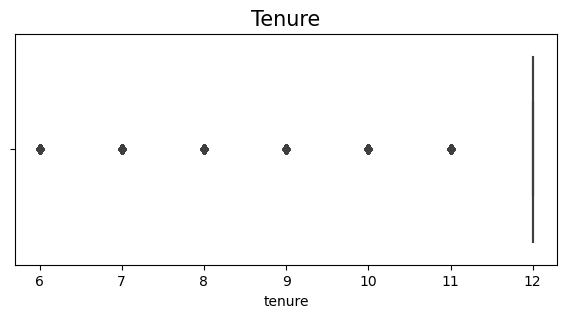

In [29]:
for col in df.columns:
    fig, ax = plt.subplots(figsize=(7, 3))
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col.capitalize(), fontsize=15)
    plt.show()

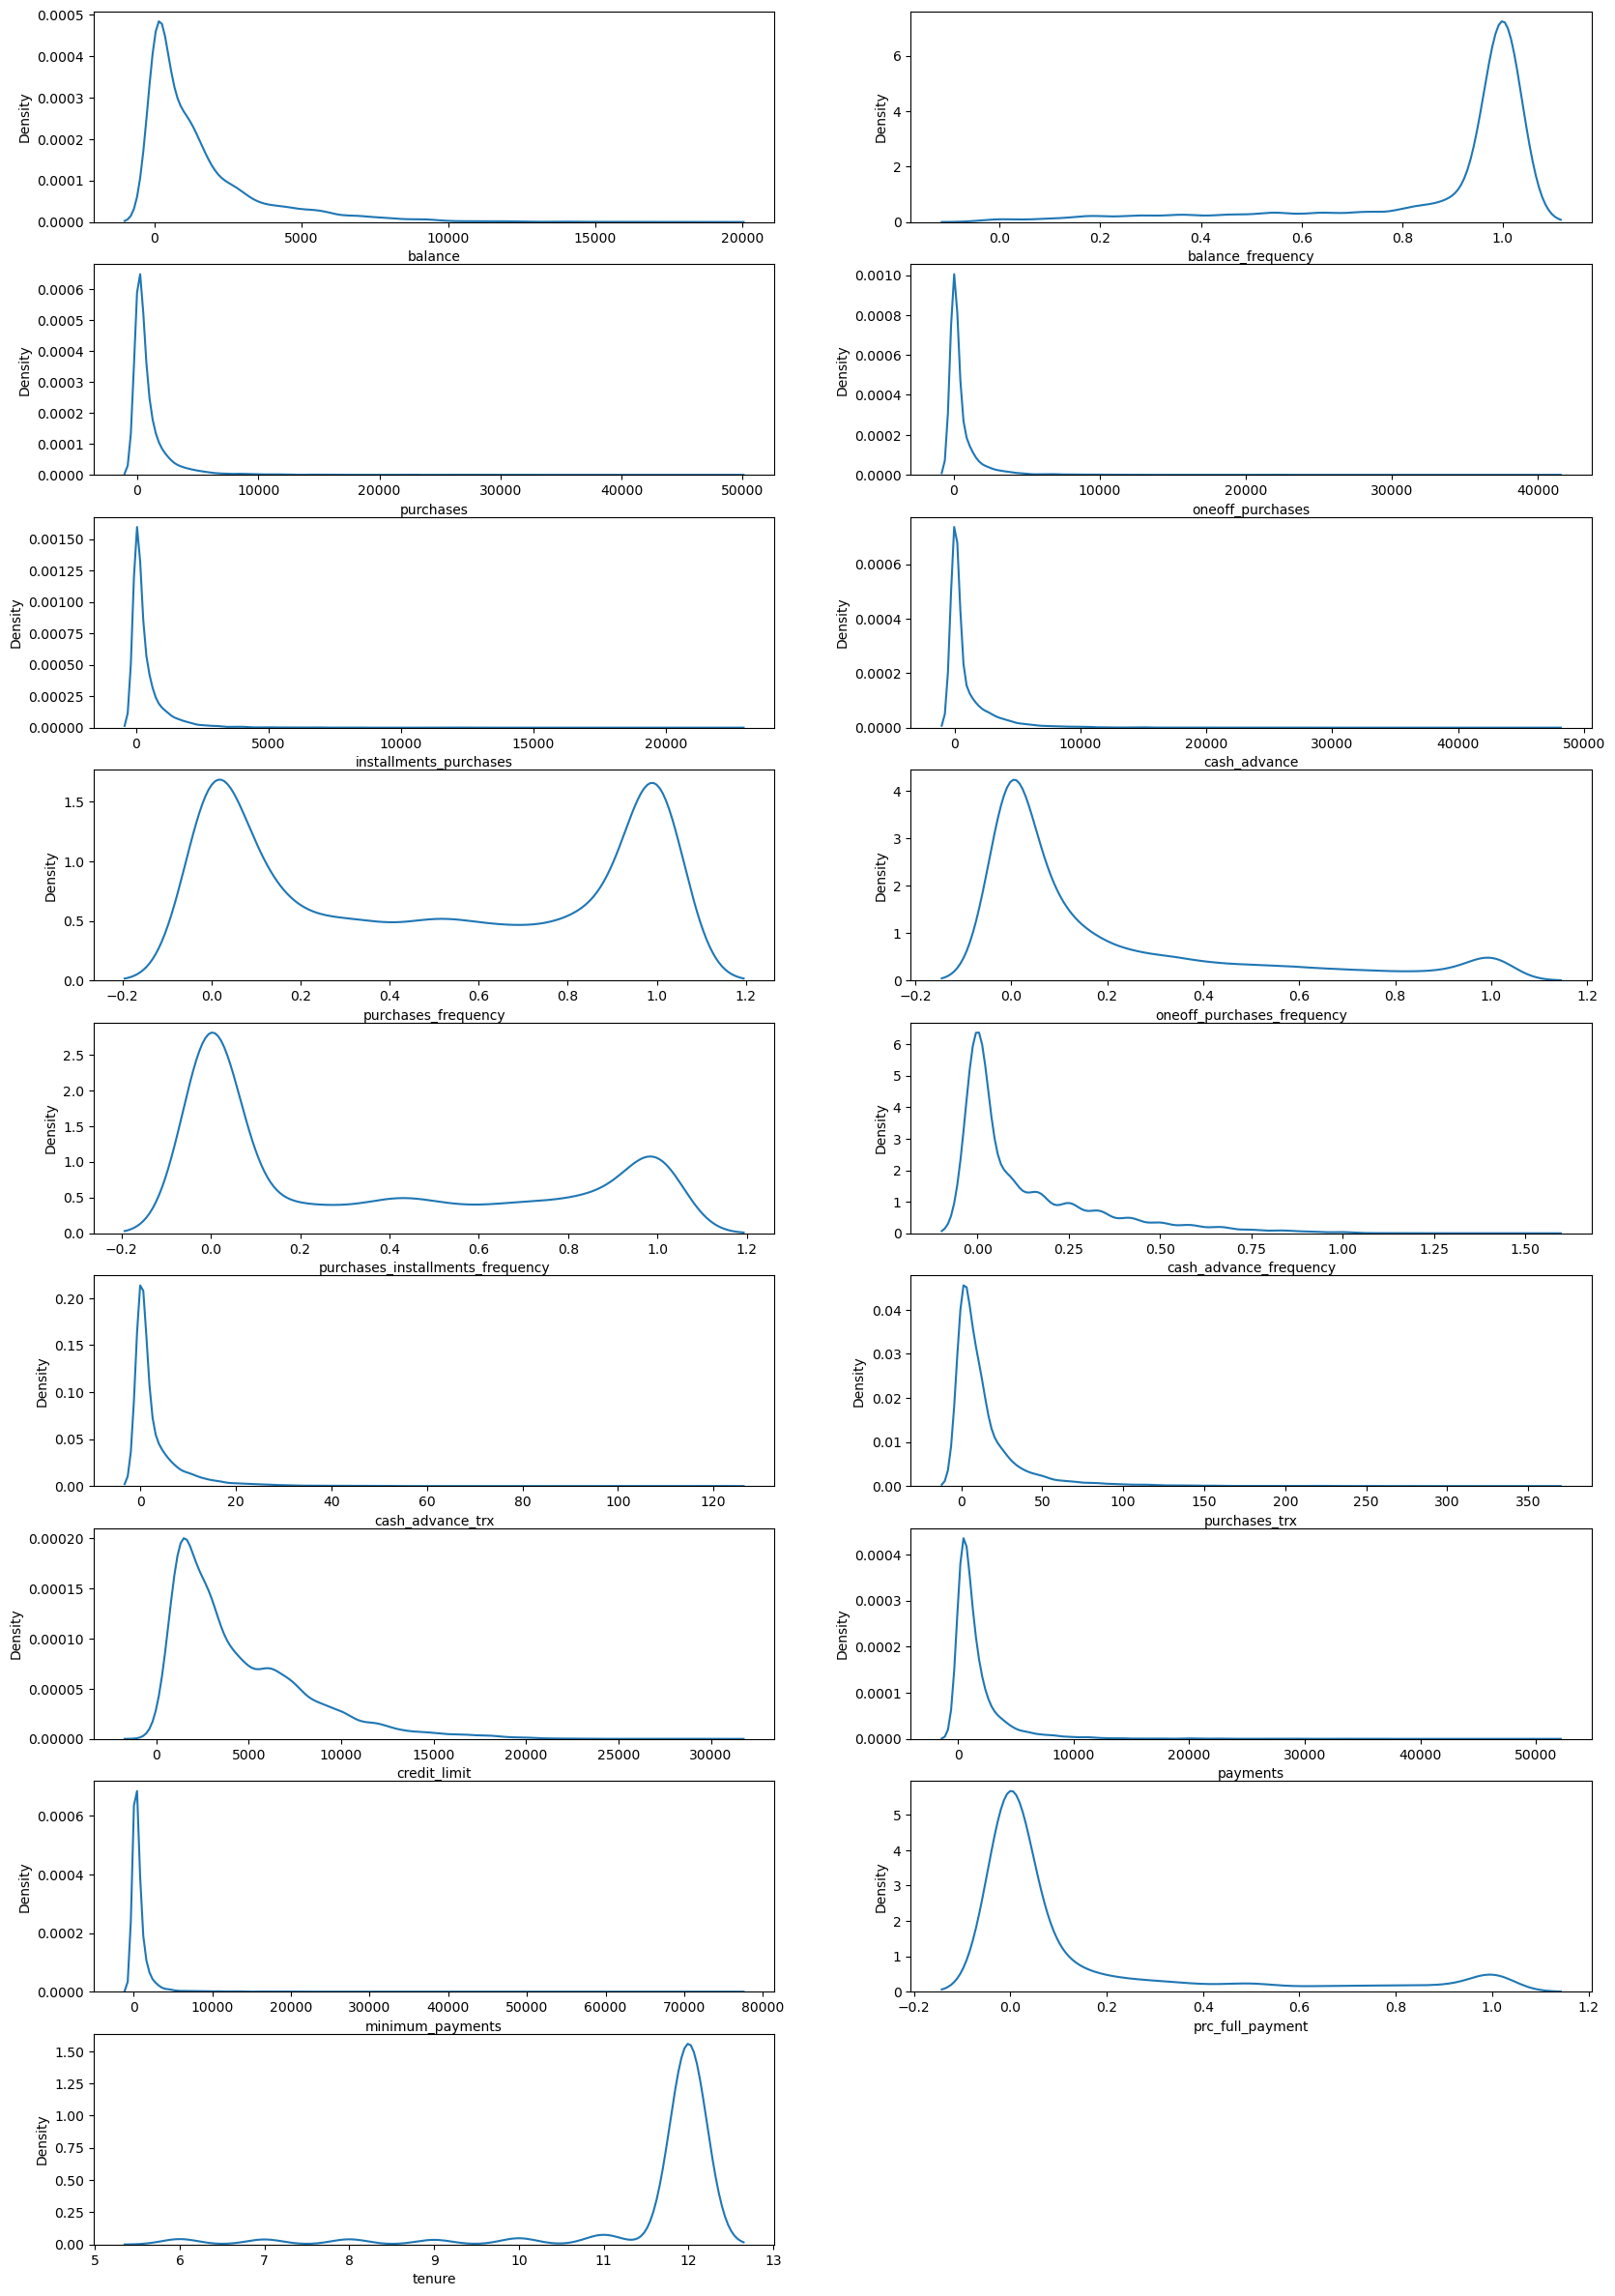

In [30]:
plt.figure(figsize=(20,30))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

> <b> inference</b>: The graphs above reveal that there are many outliers. We must be careful, because if we delete them, we can lose valuable information. Instead, we can deal with them in another way. 


<h3> Dealing with Outliers </h3>

Instead of removing outliers, we'll transform the numeric columns of the data frame into categorical ranges. These ranges are used to discretize continuous data into specific intervals, which can make data analysis easier, reduce the impact of outliers, and potentially improve the performance of certain machine learning algorithms that work better with categorical data.

In [32]:
columns=['balance', 'purchases', 'oneoff_purchases', 'installments_purchases', 'cash_advance', 'credit_limit',
        'payments', 'minimum_payments']

for c in columns:
    
    Range =c +'_RANGE'
    
    df[Range] = 0        
    df.loc[((df[c]>0)&(df[c]<=500)),Range] = 1
    df.loc[((df[c]>500)&(df[c]<=1000)),Range] = 2
    df.loc[((df[c]>1000)&(df[c]<=3000)),Range] = 3
    df.loc[((df[c]>3000)&(df[c]<=5000)),Range] = 4
    df.loc[((df[c]>5000)&(df[c]<=10000)),Range] = 5
    df.loc[((df[c]>10000)),Range] = 6 


In [33]:
columns=['balance_frequency', 'purchases_frequency', 'oneoff_purchases_frequency', 'purchases_installments_frequency', 
         'cash_advance_frequency', 'prc_full_payment']

for c in columns:
    
    Range = c + '_RANGE'
    df[Range] = 0
    df.loc[((df[c]>0)&(df[c]<=0.1)),Range] = 1
    df.loc[((df[c]>0.1)&(df[c]<=0.2)),Range] = 2
    df.loc[((df[c]>0.2)&(df[c]<=0.3)),Range] = 3
    df.loc[((df[c]>0.3)&(df[c]<=0.4)),Range] = 4
    df.loc[((df[c]>0.4)&(df[c]<=0.5)),Range] = 5
    df.loc[((df[c]>0.5)&(df[c]<=0.6)),Range] = 6
    df.loc[((df[c]>0.6)&(df[c]<=0.7)),Range] = 7
    df.loc[((df[c]>0.7)&(df[c]<=0.8)),Range] = 8
    df.loc[((df[c]>0.8)&(df[c]<=0.9)),Range] = 9
    df.loc[((df[c]>0.9)&(df[c]<=1.0)),Range]=10

In [34]:
columns=['purchases_trx', 'cash_advance_trx']  

for c in columns:
    
    Range=c + '_RANGE'
    df[Range] = 0
    df.loc[((df[c]>0)&(df[c]<=5)),Range] = 1
    df.loc[((df[c]>5)&(df[c]<=10)),Range] = 2
    df.loc[((df[c]>10)&(df[c]<=15)),Range] = 3
    df.loc[((df[c]>15)&(df[c]<=20)),Range] = 4
    df.loc[((df[c]>20)&(df[c]<=30)),Range] = 5
    df.loc[((df[c]>30)&(df[c]<=50)),Range] = 6
    df.loc[((df[c]>50)&(df[c]<=100)),Range] = 7
    df.loc[((df[c]>100)),Range] = 8

In [36]:
df.drop(['balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency',  'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment' ], axis=1, inplace=True)

X= np.asarray(df)

<h3>Normalizing input values</h3>

In [38]:
## Standarized data

std = StandardScaler()
X = std.fit_transform(X)
X.shape

(8950, 17)

<h1> Modeling Data </h1>

In [39]:
data_imputed = pd.DataFrame(X, columns=df.columns)

### Correlation Check 

In [41]:
data_imputed.corr().head()

,tenure,balance_RANGE,purchases_RANGE,oneoff_purchases_RANGE,installments_purchases_RANGE,cash_advance_RANGE,credit_limit_RANGE,payments_RANGE,minimum_payments_RANGE,balance_frequency_RANGE,purchases_frequency_RANGE,oneoff_purchases_frequency_RANGE,purchases_installments_frequency_RANGE,cash_advance_frequency_RANGE,prc_full_payment_RANGE,purchases_trx_RANGE,cash_advance_trx_RANGE
tenure,1.000000,0.074736,0.124151,0.096099,0.109638,-0.102520,0.166510,0.195283,0.103318,0.112589,0.061732,0.079818,0.071829,-0.120745,-0.012288,0.157061,-0.064210
balance_RANGE,0.074736,1.000000,0.016812,0.115620,-0.028467,0.548784,0.406749,0.364884,0.706081,0.424218,-0.140057,0.061722,-0.120086,0.488106,-0.434598,-0.000244,0.478661
purchases_RANGE,0.124151,0.016812,1.000000,0.805417,0.709179,-0.293571,0.292426,0.431903,0.057039,0.159737,0.701621,0.661242,0.533052,-0.266689,0.241117,0.828506,-0.244439
oneoff_purchases_RANGE,0.096099,0.115620,0.805417,1.000000,0.272529,-0.150309,0.325604,0.410035,0.047292,0.148383,0.402533,0.809821,0.136761,-0.128285,0.099675,0.619091,-0.110570
installments_purchases_RANGE,0.109638,-0.028467,0.709179,0.272529,1.000000,-0.261565,0.169201,0.302896,0.066691,0.138002,0.702409,0.242210,0.797574,-0.244249,0.260922,0.731814,-0.222354


<Axes: >

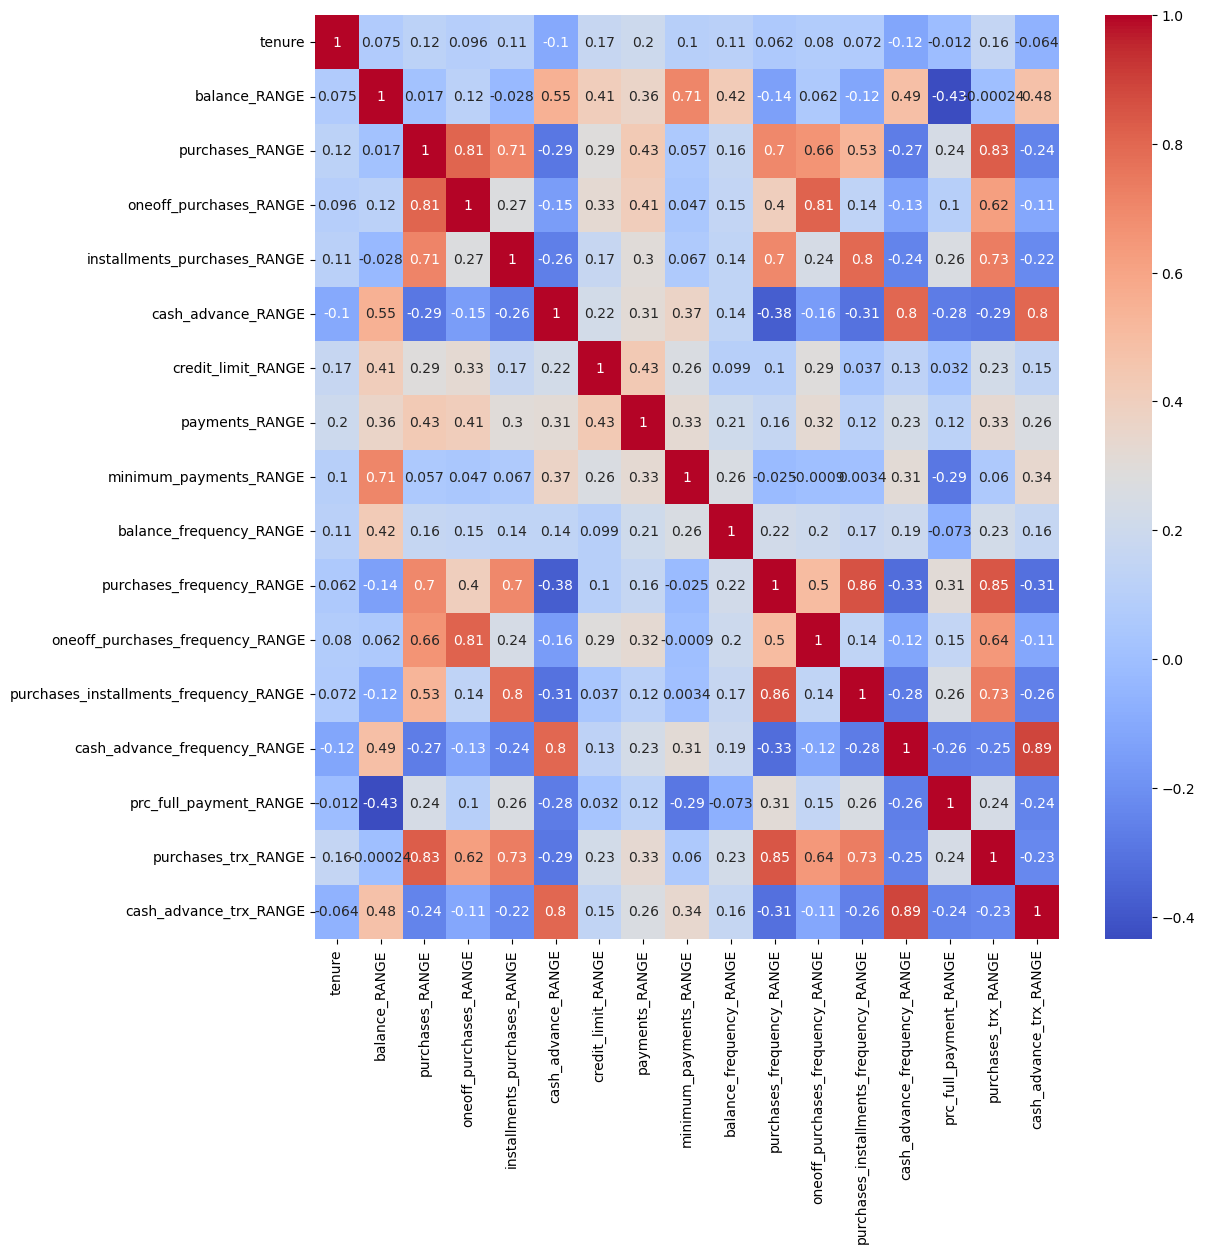

In [42]:
plt.figure(figsize = (12, 12))
sns.heatmap(data_imputed.corr(), annot=True, cmap='coolwarm', 
            xticklabels=data_imputed.columns,
            yticklabels=data_imputed.columns)

### Feature Extraction with PCA

<h3> Intertia Plot </h3>

Inertia is a metric that measures the sum of squared distances between data points and their assigned cluster centers. It is often used to determine the optimal number of clusters in algorithms like K-Means.

In [43]:
# Inertia plotter function
def inertia_plot(clust, X, start = 2, stop = 20):
    inertia = []
    for x in range(start,stop):
        km = clust(n_clusters = x)
        labels = km.fit_predict(X)
        inertia.append(km.inertia_)
    plt.figure(figsize = (12,6))
    plt.plot(range(start,stop), inertia, marker = 'o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.title('Inertia plot with K')
    plt.xticks(list(range(start, stop)))
    plt.show()

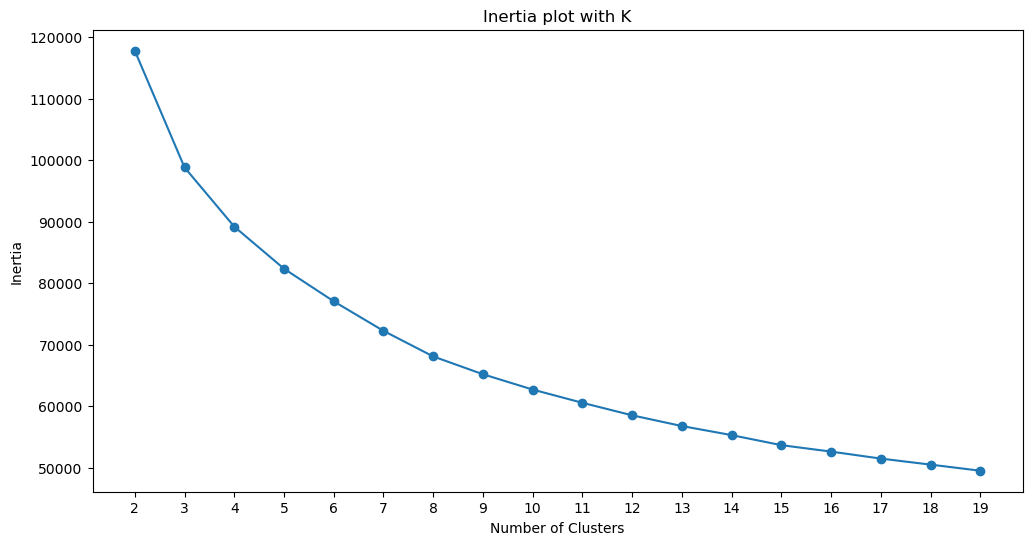

In [44]:
inertia_plot(KMeans, data_imputed)

In [45]:
# apply PCA and display clustering metrics
for y in range(2, 7):
    print("PCA with # of components: ", y)
    pca = PCA(n_components=y)
    data_p = pca.fit_transform(data_imputed)
    for x in range(2, 7):
        alg = KMeans(n_clusters = x, )
        label = alg.fit_predict(data_p)
        print('Silhouette-Score for', x,  'Clusters: ', round(silhouette_score(data_p, label),3 ), '       Inertia: ',round(alg.inertia_, 3))
    print()

PCA with # of components:  2
Silhouette-Score for 2 Clusters:  0.376        Inertia:  49691.784
Silhouette-Score for 3 Clusters:  0.405        Inertia:  30709.701
Silhouette-Score for 4 Clusters:  0.392        Inertia:  23400.452
Silhouette-Score for 5 Clusters:  0.368        Inertia:  19012.357
Silhouette-Score for 6 Clusters:  0.37        Inertia:  15550.531

PCA with # of components:  3
Silhouette-Score for 2 Clusters:  0.331        Inertia:  63137.497
Silhouette-Score for 3 Clusters:  0.337        Inertia:  44385.307
Silhouette-Score for 4 Clusters:  0.323        Inertia:  35158.522
Silhouette-Score for 5 Clusters:  0.324        Inertia:  29567.745
Silhouette-Score for 6 Clusters:  0.33        Inertia:  25264.428

PCA with # of components:  4
Silhouette-Score for 2 Clusters:  0.295        Inertia:  74350.43
Silhouette-Score for 3 Clusters:  0.292        Inertia:  55580.322
Silhouette-Score for 4 Clusters:  0.274        Inertia:  46187.526
Silhouette-Score for 5 Clusters:  0.267    

> <b>Inference</b>: Using the elbow method and looking at the clustering metrics, we can choose a good number of clusters between 5 and 6. We chose 6 clusters.

In [46]:
kmean= KMeans(6)
kmean.fit(data_imputed)
labels=kmean.labels_

<h3> Visualization of Clusters</h3>

Using PCA to transform data to 2 dimensions for visualization.

In [49]:
dist = 1 - cosine_similarity(X)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
X_PCA.shape

(8950, 2)

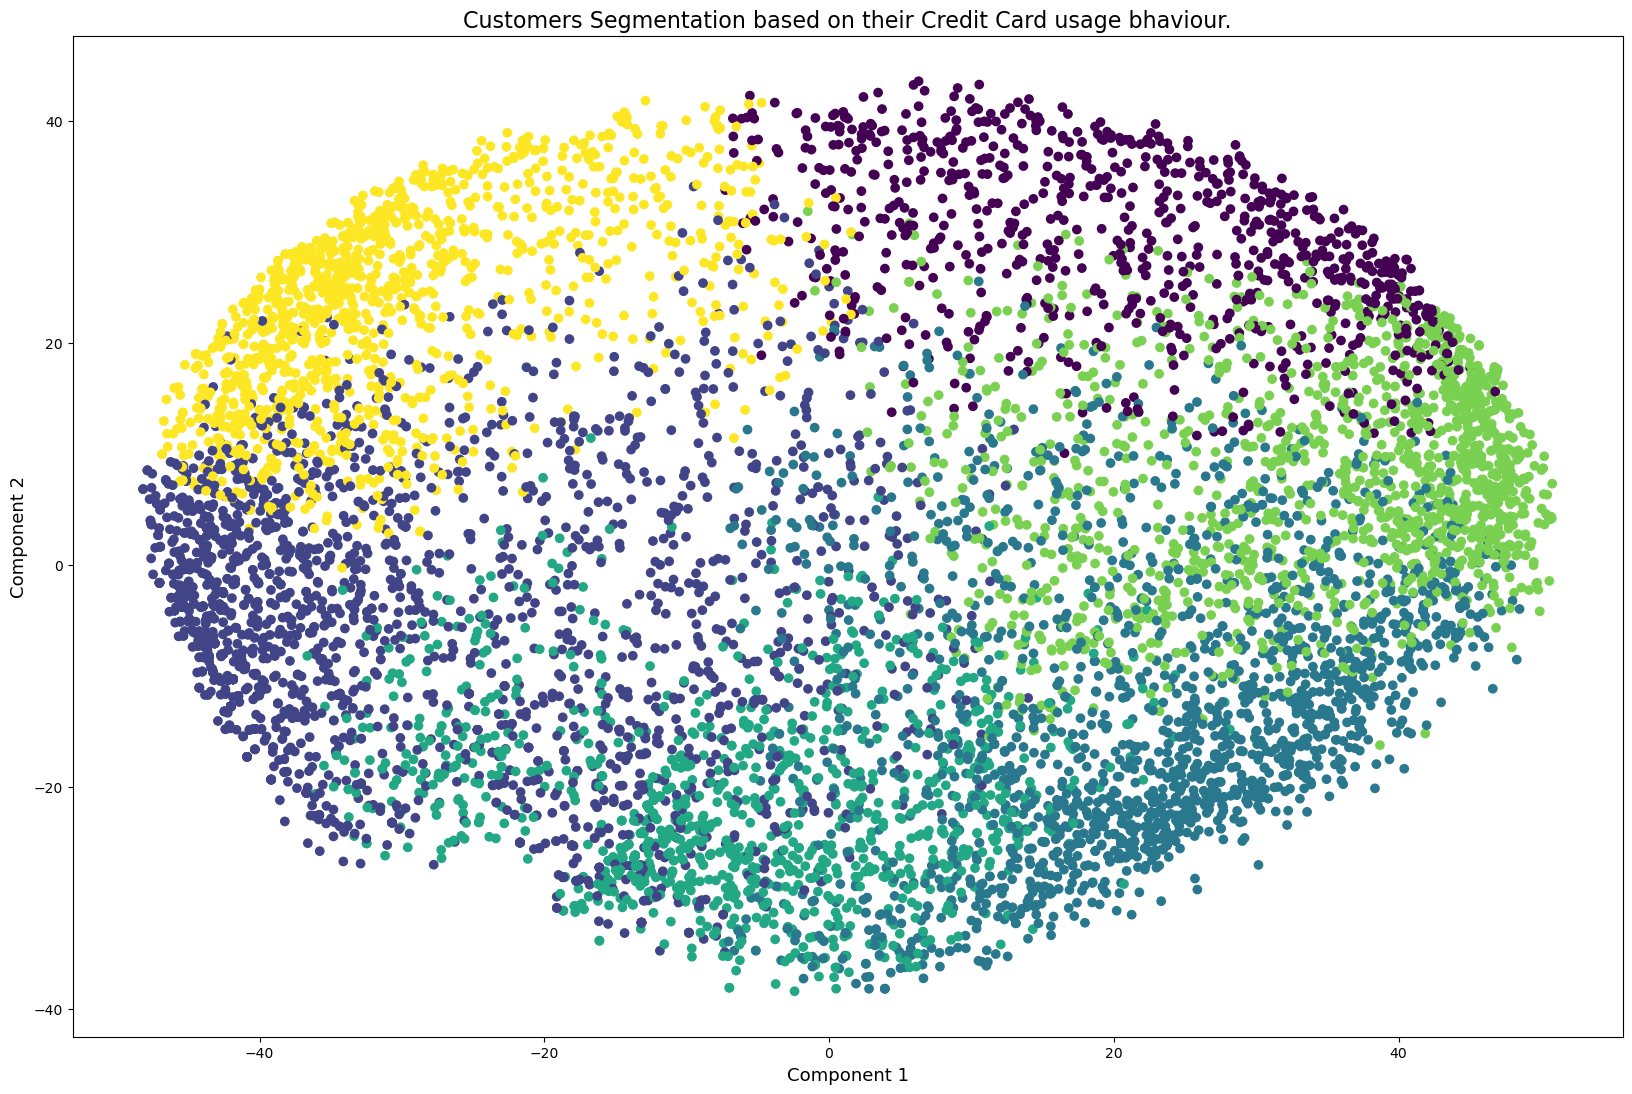

In [53]:
fig, ax = plt.subplots(figsize=(20, 13))
ax.scatter(X_PCA[:, 0], X_PCA[:, 1], c=label)
ax.set_title('Customers Segmentation based on their Credit Card usage bhaviour.', fontsize=16)
ax.set_xlabel('Component 1', fontsize=13)
ax.set_ylabel('Component 2', fontsize=13)

plt.show()